## 1. Data review

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('D:\docs\DS\real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    

data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [192]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True)

### 1.1. Changing Data Types
At first glance, the displayed part of the dataset reveals numerous missing values as well as incorrect date formatting. Let's take a look at the general dataset information:

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Indeed, the date is recorded in the object format, and some categorical data has been assigned the int64 type, which can be converted to category to improve performance. These include `parks_around3000` and `ponds_around3000`.

At the same time, we will keep the data type unchanged for the columns `total_images`, `rooms`, `floors_total`, `floor`, and `balcony`—this will be useful later for filtering and visualization.

The `is_apartment` column is expected to contain boolean values, but it is currently of type object due to missing values. For now, we will leave this column unchanged.

In [194]:
for column in ['parks_around3000', 'ponds_around3000']:
    data[column] = data[column].astype('category')
    
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### 1.2. General Data Assessment
The dataset contains 23,699 observations, with correctly named columns—no Cyrillic characters or spaces. The data types are mostly assigned correctly. However, noticeable gaps in the data stand out.

To get a preliminary assessment of the extent of the issue, we will count the number of missing values for each column and calculate their share as a percentage of the total observations.

In [195]:
missing_data_start = data.isna().sum().to_frame().rename(columns = {0: 'missing_values_start'})

missing_data_start['total_values_start'] = data.shape[0]
missing_data_start['% of total_start'] = (missing_data_start['missing_values_start'] / data.shape[0] * 100).round(2)

missing_data_start.sort_values('missing_values_start', ascending = False)

,missing_values_start,total_values_start,% of total_start
is_apartment,20924,23699,88.29
parks_nearest,15620,23699,65.91
ponds_nearest,14589,23699,61.56
balcony,11519,23699,48.61
ceiling_height,9195,23699,38.80
airports_nearest,5542,23699,23.38
city_centers_nearest,5519,23699,23.29
ponds_around3000,5518,23699,23.28
parks_around3000,5518,23699,23.28
days_exposition,3181,23699,13.42


Some columns have a significant number of missing values (20% or more), which we will take into account later in the analysis.

For an initial exploration of the data, let's plot a histogram for each numerical column in the dataset.

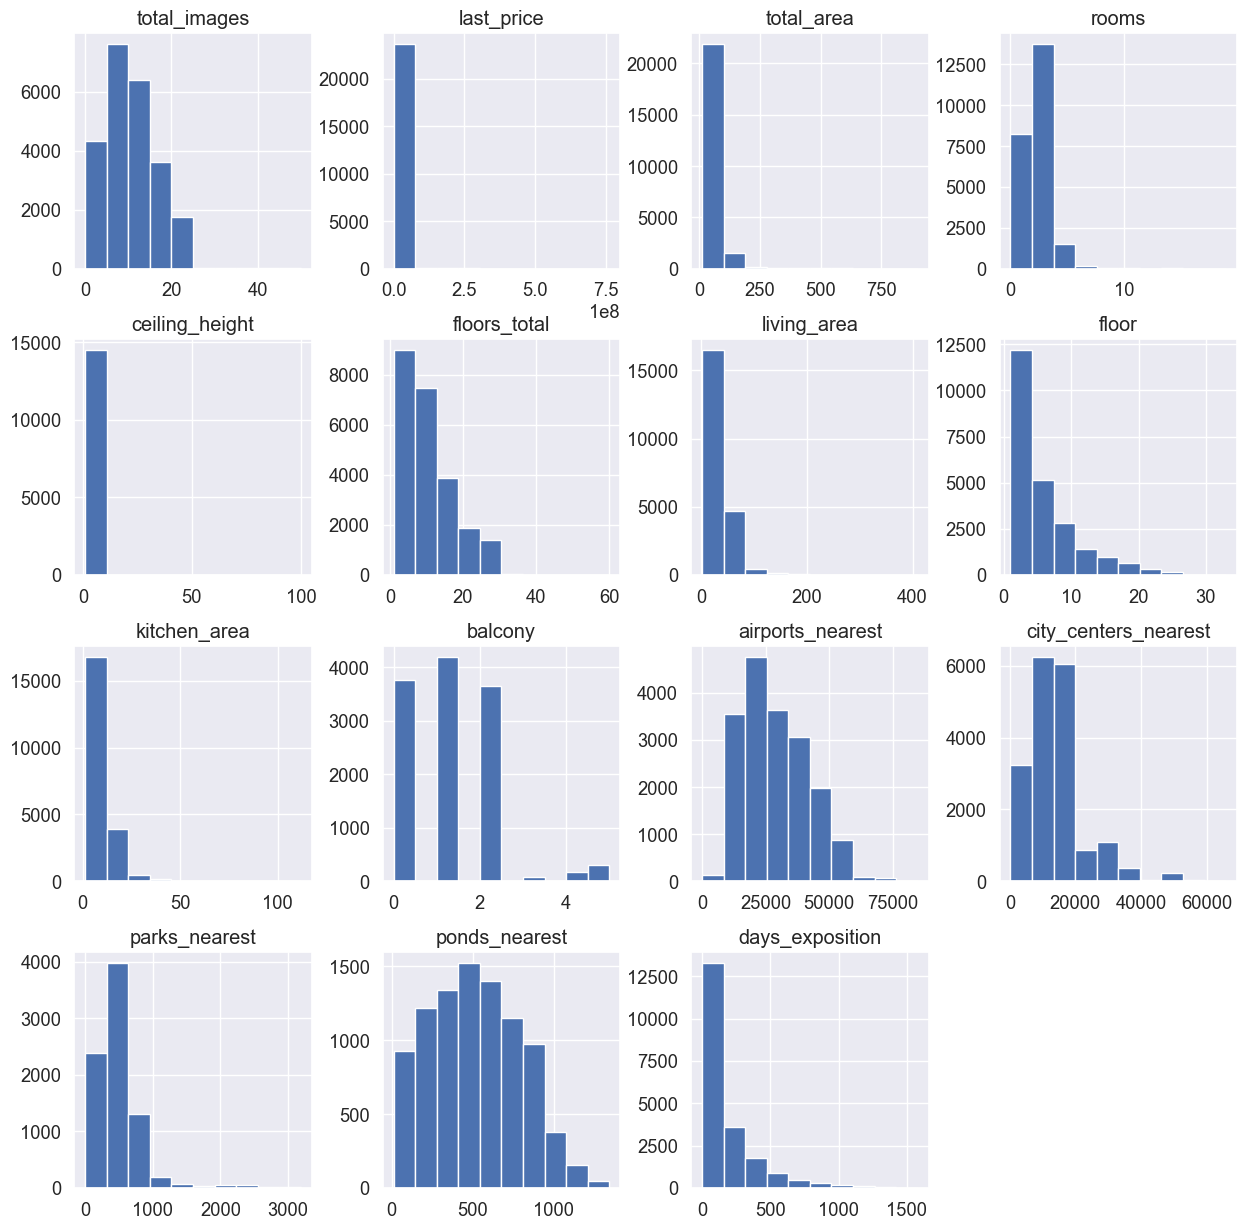

In [196]:
data.select_dtypes(include=['int64', 'float64']).hist(figsize=(15, 15))
plt.show()

As a result of our initial data exploration, we optimized the dataset by converting some numerical values into categorical ones. We also assessed missing values and stored their counts in the `missing_data_start` variable. Later, we will recall this variable to evaluate how data preprocessing affects the dataset.

The preliminary histograms suggest potential outliers—for instance, buildings taller than 30 floors or apartments with more than 4 balconies. These are likely data entry errors, which we will examine in more detail when working with outliers.

## 2. Data Preprocessing
### 2.1. Handling Missing Data
####  2.1.1 LOCALITY_NAME
Let's start handling missing values in one of the most critical columns for our study: `locality_name` (name of the settlement).
As a reminder, 49 observations in this column are missing values. Let's take a closer look at these objects:

In [197]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


The objects are quite diverse—they vary in size, price, and number of floors, making it impossible to guess or infer their location.Since these observations account for only 0.21% of the dataset, they can be safely removed without distorting the overall picture.

In [198]:
data.dropna(subset=['locality_name'], inplace=True) 
data[data['locality_name'].isna()]['locality_name']

Series([], Name: locality_name, dtype: object)

####  2.1.2 IS_APARTMENT
Now, let's examine the column with the most missing values. We'll check how users have been filling in this field.

In [199]:
data[data['is_apartment'].notna()]['is_apartment'].value_counts()

is_apartment
False    2710
True       50
Name: count, dtype: int64

In [200]:
data.query('is_apartment.notna()')['locality_name'].value_counts()

locality_name
Санкт-Петербург                        1833
посёлок Шушары                           58
посёлок Мурино                           54
деревня Кудрово                          48
Пушкин                                   48
                                       ... 
поселок городского типа Кондратьево       1
коттеджный поселок Счастье                1
поселок Суходолье                         1
поселок городского типа Лебяжье           1
посёлок Понтонный                         1
Name: count, Length: 140, dtype: int64

A total of 2,760 users specified this parameter, and the majority indicated that the property is not an apartment. Since apartments are legally classified as non-residential real estate, their prices are typically lower than those of standard residential properties.

In Saint Petersburg, there are 1,833 properties where the `is_apartment` attribute is filled in. This should be sufficient to compare apartment prices with regular residential property prices.

In [201]:
aparts= (data.query('is_apartment.notna()')
.pivot_table(index='locality_name', columns='is_apartment', values=['last_price', 'total_area'], aggfunc='median')
        )

aparts.columns= ['not_apartment_price', 'is_apartment_price', 'not_apartment_area', 'apartment_area']    
(aparts.dropna()
.reset_index()
.query('locality_name == "Санкт-Петербург"')
)

,locality_name,not_apartment_price,is_apartment_price,not_apartment_area,apartment_area
7,Санкт-Петербург,5500000.0,6900000.0,56.0,58.0


In the resulting data, we observe the opposite trend in most cases: the median price of apartments is higher than that of regular residential properties, even though their median area is roughly the same.

This suggests that users filling in the `is_apartment` field were not always accurate, likely because this type of real estate emerged relatively recently. However, it's important to note that over 88% of entries in the dataset have this field left blank.

In this case, filling in the missing values or removing rows with missing data would not be practical. Instead, it would be better to exclude this characteristic from our analysis altogether.

#### 2.1.3 PONDS and PARKS
The number of missing values is too high for these fields:

* parks_nearest: 15,620 missing values (65.91%)
* ponds_nearest: 14,589 missing values (61.56%)
* ponds_around3000: 5,518 missing values (23.30%)
* parks_around3000: 5,518 missing values (23.30%)

Given the large proportion of missing data, we will leave these fields unchanged and not rely on them in this study.

#### 2.1.4 BALCONY
The original dataset contains a high number of missing values for the balcony field:  
`balcony                        11519       48.61`  
Almost half of the dataset is missing this information. Let's check in which cities and how often users forgot to enter the number of balconies.

In [202]:
data.query('balcony.isna()')['locality_name'].value_counts()

locality_name
Санкт-Петербург                     7712
посёлок Мурино                       242
Всеволожск                           188
посёлок Шушары                       181
Пушкин                               170
                                    ... 
садовое товарищество Новая Ропша       1
село Паша                              1
поселок Серебрянский                   1
посёлок Алексеевка                     1
село Рождествено                       1
Name: count, Length: 288, dtype: int64

The vast majority of properties are located in St. Petersburg, which is expected. Additionally, a significant number of listings are from Murino, Vsevolozhsk, and Shushary. Now, let's check the floor levels of apartments where the balcony information is missing.

In [203]:
data.query("balcony.isna() and locality_name.isin(['Санкт-Петербург', 'посёлок Мурино', 'Всеволожск', 'посёлок Шушары'])").pivot_table(index=['floor'], columns='locality_name', values='total_area', aggfunc='count')

locality_name,Всеволожск,Санкт-Петербург,посёлок Мурино,посёлок Шушары
floor,,,,
1,40.0,1085.0,11.0,27.0
2,43.0,1135.0,9.0,22.0
3,31.0,1021.0,18.0,29.0
4,16.0,931.0,12.0,14.0
5,15.0,796.0,11.0,17.0
6,11.0,450.0,10.0,12.0
7,5.0,393.0,15.0,7.0
8,6.0,359.0,12.0,5.0
9,8.0,310.0,14.0,6.0


As expected, most of these properties are located on the first floor. In St. Petersburg, there are also many such apartments on the 2nd-5th floors, which can be explained by older buildings where balconies were either never built or later removed.  
Regarding higher-floor apartments (excluding obvious outliers), it's likely that these are newly built apartments, often studios or small-sized units that typically do not have balconies.  
In this case, we can safely replace the missing values with zeros:

In [204]:
data['balcony'] = data['balcony'].fillna(0)
print(f"Properties with missing balcony count: {len(data.query('balcony.isna()'))}")

Properties with missing balcony count: 0


#### 2.1.5 LIVING_AREA
The number of missing values in this column is relatively small:  
`living_area                     1903        8.03%`  

This indicator is important for determining the value of an apartment. First, let's check which types of apartments are missing the living area information.

In [205]:
(data.query('living_area.isna()')[['total_area','rooms','open_plan', 'studio']] 
 .sort_values(['rooms', 'total_area'], ascending=False)
)

,total_area,rooms,open_plan,studio
8860,235.0,9,False,False
3117,631.0,7,False,False
5873,400.0,7,False,False
581,365.0,7,False,False
10684,364.7,7,False,False
...,...,...,...,...
608,25.0,0,False,True
5749,25.0,0,True,False
4901,24.0,0,False,True
3874,21.4,0,False,True


The living area is missing in both multi-room apartments and studios, totaling 1,898 properties. We will replace the missing values with the median value for apartments with the corresponding number of rooms. But first, let's check the minimum values for apartments based on the number of rooms.

In [206]:
rooms_pivot_data = (data.pivot_table(index='rooms', 
                                            values=['total_area', 'living_area', 'kitchen_area'], 
                                            aggfunc='median')
                   )

rooms_pivot_data

,kitchen_area,living_area,total_area
rooms,,,
0,NaN,18.000,26.05
1,9.01,17.600,36.53
2,8.80,30.500,53.00
3,9.50,45.000,72.90
4,11.05,63.800,99.50
5,15.10,91.785,146.45
6,19.50,123.900,184.30
7,20.00,145.000,214.00
8,25.00,161.000,235.70


In [207]:
def set_living_area(row):
    
    living_area = row['living_area']
    rooms = row['rooms']

    if pd.isna(row.living_area):
        return rooms_pivot_data.iloc[rooms, 1]

    return living_area

data['living_area'] = data.apply(set_living_area, axis = 1)

print(f"Missing values in living_area: {data.query('living_area.isna()')['living_area'].count()}")

Missing values in living_area: 0


Now, let's check how many values in the `living_area column` are less than 9 m², which is the minimum living space area in an apartment.

In [208]:
data.query('living_area < 9')[['living_area', 'kitchen_area', 'total_area', 'rooms']]

,living_area,kitchen_area,total_area,rooms
114,8.3,6.3,21.4,1
2309,8.4,41.0,62.4,2
3242,3.0,11.0,41.0,1
13915,2.0,9.0,52.0,2
16431,6.0,17.0,31.0,1
17248,8.9,16.1,33.0,1
17582,5.0,NaN,22.0,0
19251,6.5,18.0,33.0,1
20994,8.0,31.0,50.6,2
21505,8.5,16.1,35.3,1


There are only a few such values; however, all apartments in this list have an adequate total area. We will keep these data for analyzing other characteristics. For the correlation study between price and living area, we will use a subset where `living_area >= 9`.

#### 2.1.6 KITCHEN_AREA
The number of missing values in this column slightly exceeds that of the living area:  
`kitchen_area                    2278        9.61%`  

We will fill these missing values using the same approach applied to `living_area`. To do this, we will calculate the median kitchen area by creating a pivot table based on a selected subset: kitchen area of 5 square meters or more (according to existing minimum kitchenette size regulations).  

It is important to note that in older housing stock in St. Petersburg and its suburbs, there may be exceptionally small kitchens of less than 5 m². However, the proportion of such apartments is relatively low.

In [209]:
kitchen_pivot_data = (data.query('kitchen_area >= 5')
                      .pivot_table(index='rooms', 
                                   values=['total_area', 'living_area', 'kitchen_area'], 
                                   aggfunc='median')
                     )
kitchen_pivot_data

,kitchen_area,living_area,total_area
rooms,,,
1,9.10,17.60,36.9
2,8.80,30.50,53.0
3,9.50,45.00,73.0
4,11.10,63.80,99.5
5,15.10,91.80,146.9
6,19.50,123.90,183.7
7,20.00,145.00,212.0
8,25.00,160.00,235.0
9,14.30,179.20,309.7


In [210]:
def set_kitchen_area(row):
    
    kitchen_area = row['kitchen_area']
    rooms = row['rooms']

    if pd.isna(row.kitchen_area):
        return kitchen_pivot_data.iloc[rooms, 0]

    return kitchen_area

data['kitchen_area'] = data.apply(set_kitchen_area, axis = 1)

print(f"Missing values in kitchen_area: {data.query('kitchen_area.isna()')['kitchen_area'].count()}")

Missing values in kitchen_area: 0


#### 2.1.7. Other Factors
Let's examine the remaining columns with missing values:
1. `ceiling_height                  9195       38.80%`
2. `airports_nearest                5542       23.38%`
3. `cityCenters_nearest             5519       23.29%`
4. `days_exposition                 3181       13.42%`
5. `floors_total                      86        0.36%`  
Columns 2-4 contain automatically collected data. Since none of these indicators can be reliably filled using mean or median values, and we cannot request dataset corrections from colleagues, we will work with what we have.

For `floors_total`, the percentage of missing values is minimal and will not significantly impact the dataset. To avoid losing other valuable data, we will keep these observations and use filtered subsets in further analysis.

Regarding `ceiling_height`, nearly ten thousand entries lack information on ceiling height. In older buildings in St. Petersburg and its historic suburbs, ceiling heights can vary significantly. Thus, filling in missing values with an average or median would not be appropriate. As with the missing automatically collected data, we will proceed with the available information. Later in the study, we will revisit this column to check data validity and address outliers.

**Summary**  
* Removed rows with missing key indicators (city name).
* Left unchanged the columns with a high number of missing values where no clear pattern was observed.
* In the cartographic data on parks and ponds, filled in missing values with zeros, based on the logic that if the distance to an object is not specified, the object was not found. Additionally, no rows were found where the distance to a park/pond was specified but the number of such objects was missing.
* For `living_area` and `kitchen_area`, replaced missing values with the minimum recorded area for apartments with the corresponding number of rooms.

### 2.2. Handling Duplicates
First, let's check if there are any obvious duplicates in the dataset.

In [211]:
data.duplicated().sum()

0

No full duplicates were found in the dataset. Now, let's work with implicit duplicates that might be present in the `locality_name` column. By standardizing the city names, we may identify duplicate entries. Let's check the unique values in this column.

In [212]:
print(f"Unique names number: {len(data['locality_name'].unique())} \n \n"
      f"Unique names list: \n {data['locality_name'].unique()}"
     )

Unique names number: 364 
 
Unique names list: 
 ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'

The first noticeable inconsistency is the different spellings of "пос**ё**лок" and "пос**е**лок." We will standardize the spelling to eliminate implicit duplicates.

In [213]:
data['locality_name'] = data['locality_name'].replace(r"\поселок", "посёлок", regex=True)

print(f"Unique names number: {len(data['locality_name'].unique())} \n \n"
      f"Unique names list: \n {data['locality_name'].unique()}"
     )

Unique names number: 330 
 
Unique names list: 
 ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'посёлок городского типа Красный Бор' 'Гатчина' 'деревня Фёдоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'посёлок Металлострой' 'посёлок городского типа Лебяжье'
 'посёлок городского типа Сиверский' 'посёлок Молодцово'
 'посёлок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' '

In the first step, we managed to eliminate 34 duplicates.

Now, using lemmatization, we will identify repeated elements in the locality names, excluding settlement types like "деревня," "село," "станция," etc.

In [214]:
# !pip install pymystem3

from pymystem3 import Mystem
m = Mystem()
from collections import Counter

names = data['locality_name'].unique()
text = ''

for i in names:
    text += str(i) + ' '

lemmas = m.lemmatize(text)
print(Counter(lemmas))

Counter({' ': 753, 'поселок': 167, 'деревня': 106, 'городской': 43, 'тип': 30, '-': 10, 'село': 10, 'станция': 8, 'большой': 7, 'бор': 6, 'старый': 6, 'новый': 5, 'товарищество': 5, 'красный': 4, 'садовый': 4, 'малый': 4, 'павлово': 3, 'ижора': 3, 'лесной': 3, 'коттеджный': 3, 'муриный': 2, 'кудрово': 2, 'коммунар': 2, 'федоровский': 2, 'ропша': 2, 'никольское': 2, 'сосновый': 2, 'романовка': 2, 'рощино': 2, 'луг': 2, 'советский': 2, 'лесогорский': 2, 'рахья': 2, 'колпана': 2, 'ладога': 2, 'зимитиц': 2, 'имя': 2, 'рябово': 2, 'бегуница': 2, 'поляна': 2, 'мга': 2, 'вещево': 2, 'приладожский': 2, 'щегловый': 2, 'рабитиц': 2, 'назия': 2, 'саперный': 2, 'гарболовый': 2, 'приветнинский': 2, 'усть': 2, 'любань': 2, 'горка': 2, 'при': 2, 'железнодорожный': 2, 'громовый': 2, 'тесовый': 2, 'нижний': 2, 'санкт-петербург': 1, 'шушар': 1, 'янино': 1, '1': 1, 'парголовый': 1, 'ломоносов': 1, 'сертолово': 1, 'петергоф': 1, 'пушкин': 1, 'колпино': 1, 'гатчина': 1, 'выборг': 1, 'кронштадт': 1, 'кировс

Let's display the full names of the localities that contain duplicated elements in the list.

In [215]:
data.query('locality_name.str.contains("Мурино") or \
            locality_name.str.contains("Кудрово") or \
            locality_name.str.contains("Фёдоровское") or \
            locality_name.str.contains("Рощино") or \
            locality_name.str.contains("Павлово") or \
            locality_name.str.contains("Ижора") or \
            locality_name.str.contains("Коммунар") or \
            locality_name.str.contains("Ропша") or \
            locality_name.str.contains("Никольское") or \
            locality_name.str.contains("Романовка") or \
            locality_name.str.contains("Луг") or \
            locality_name.str.contains("Рахья") or \
            locality_name.str.contains("Ладога") or \
            locality_name.str.contains("Рябово") or \
            locality_name.str.contains("Мга") or \
            locality_name.str.contains("Вещево") or \
            locality_name.str.contains("Усть") or \
            locality_name.str.contains("Любань") or \
            locality_name.str.contains("Бегуниц") or \
            locality_name.str.contains("Бор")')['locality_name'].value_counts()

locality_name
посёлок Мурино                                556
деревня Кудрово                               299
Кудрово                                       173
Никольское                                     93
Коммунар                                       89
Сосновый Бор                                   87
Луга                                           56
посёлок Романовка                              36
Мурино                                         34
посёлок городского типа Рощино                 34
городской посёлок Мга                          27
деревня Бегуницы                               17
городской посёлок Большая Ижора                16
посёлок городского типа Рахья                  15
Новая Ладога                                   14
городской посёлок Павлово                       9
деревня Фёдоровское                             8
посёлок городского типа Красный Бор             8
Любань                                          8
городской посёлок Фёдоровское       

Let's verify using Yandex Maps whether the localities with similar names are indeed different. Then, we'll write a function that returns the correct common name for the duplicates.

In [216]:
def set_correct_names(name):
    if "посёлок городского типа Павлово" in name:
        return "городской посёлок Павлово"
    if "Мурино" in name:
        return "Мурино"
    if "Кудрово" in name:
        return "Кудрово"
    if "Фёдоровское" in name:
        return "городской посёлок Фёдоровское"
    if "Рощино" in name: 
        return "городской посёлок Рощино"
    if "Мга" in name:
        return "городской посёлок Мга"
    if "Ижора" in name:
        return "городской посёлок Ижора"
    return name

data['correct_names'] = data['locality_name'].apply(set_correct_names)

print(f"Unique names number: {len(data['correct_names'].unique())} \n \n"
      f"Unique names list: \n {data['correct_names'].unique()}"
     )

Unique names number: 322 
 
Unique names list: 
 ['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'Кудрово' 'Коммунар' 'Колпино' 'посёлок городского типа Красный Бор'
 'Гатчина' 'городской посёлок Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'посёлок Молодцово' 'посёлок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'д

We have eliminated 8 more implicit duplicates. Now, let's check if this has affected the presence of explicit duplicates in the dataset.

In [217]:
data.duplicated().sum()

0

There are no explicit duplicates in the data. Before summarizing the intermediate results, let's assess the final number of missing values.

In [218]:
missing_data = data.isna().sum().to_frame().rename(columns = {0: 'missing_values'})

missing_data['% of total'] = (missing_data['missing_values'] / data.shape[0] * 100).round(2)
missing_data.sort_values('missing_values', ascending = False)

,missing_values,% of total
is_apartment,20890,88.33
parks_nearest,15586,65.90
ponds_nearest,14565,61.59
ceiling_height,9160,38.73
airports_nearest,5534,23.40
city_centers_nearest,5511,23.30
ponds_around3000,5510,23.30
parks_around3000,5510,23.30
days_exposition,3180,13.45
floors_total,85,0.36


**Conclusion:**  
The search for duplicates did not reveal any repeated rows, but we successfully standardized 42 locality names. This will help us make more accurate calculations related to this characteristic in the future.

The dataset contains a significant number of missing values. Some of them result from human factors (e.g., missing floor numbers or balcony counts), while others are likely due to technical errors during data transfer or collection. These missing values were left unchanged and will not be used in this study.

During the data preprocessing step, 49 rows were removed due to the absence of a key object characteristic. The dataset is now ready for adding auxiliary data and conducting exploratory data analysis.

## 3. Additional Data
Let's add new columns to the dataset that will be useful for data analysis:

* `sq_meter_price` — price per square meter
* `weekday` — the day of the week the listing was published
* `month` — the month the listing was published
* `year` — the year the listing was published
* `floor_type` — the type of floor: first, last, or other
* `city_center_km` — the distance from the city center in kilometers

### 3.1. SQ_METER_PRICE
Let's calculate the price per square meter for each property in the dataset and store the result in a new column, `sq_meter_price`. We'll round the values and convert the data type to int. Since we're dealing with real estate, a rounding error of 1 ruble can be ignored in this operation.

In [219]:
data['sq_meter_price'] = (data['last_price'] / data['total_area']).astype('int')
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,посёлок Шушары,82920
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.00,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,городской посёлок Янино-1,95065
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,посёлок Парголово,99195
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,30.50,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,110544
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино,87454
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург,88524


### 3.2. WEEKDAY, MONTH, YEAR
Let's transform the publication date data by adding columns with information about the day of the week, month, and year of publication. We'll represent the results as numbers, since further operations will require a numerical data type rather than a string.

In [220]:
data['weekday'] = data['first_day_exposition'].dt.weekday 
data['month'] = data['first_day_exposition'].dt.month 
data['year'] = data['first_day_exposition'].dt.year
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,0.0,NaN,0.0,NaN,81.0,посёлок Шушары,82920,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.00,9,NaN,...,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,55.0,городской посёлок Янино-1,95065,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,0.0,NaN,0.0,NaN,155.0,посёлок Парголово,99195,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,30.50,22,NaN,...,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,110544,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,189.0,Мурино,87454,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург,88524,6,2,2017


### 3.3 FLOOR_TYPE
We'll define the floor type for each apartment in the dataset. To do this, we'll write a function that categorizes apartments into one of three types: first floor, last floor, or other.  
`floors_total                      85        0.36%`  

Since 0.36% of the listings lack information about the total number of floors, we'll assign these entries to the "other" category, along with apartments that are neither on the first nor the last floor.

In [221]:
def set_floor_type(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if pd.isna(row.floors_total):
        return 'другой' #other
    
    if floor == 1:
        return 'первый' #first
    
    if floor == floors_total:
        return 'последний' #top floor
    
    return 'другой'

data['floor_type'] = data.apply(set_floor_type, axis=1)
print(f"Check the result: \n {data[['floor', 'floors_total', 'floor_type']].head(5)} \n \n"
      f"Check floor type for objects with missing total floors: \n"
      f"{data.query('floors_total.isna()')[['floor', 'floors_total', 'floor_type']].head(10)}"
     )

Check the result: 
    floor  floors_total floor_type
0      8          16.0     другой
1      1          11.0     первый
2      4           5.0     другой
3      9          14.0     другой
4     13          14.0     другой 
 
Check floor type for objects with missing total floors: 
      floor  floors_total floor_type
186       4           NaN     другой
237       1           NaN     другой
457      12           NaN     другой
671       8           NaN     другой
1757      9           NaN     другой
1930      4           NaN     другой
2392     22           NaN     другой
2846     15           NaN     другой
2952      6           NaN     другой
3031     12           NaN     другой


###  3.4. CITY_CENTER_KM
We'll take the data from `city_centers_nearest`, which is given in meters, and calculate the distance in kilometers to be added to the new column `city_center_km`.

In [222]:
data['city_center_km'] = (data['city_centers_nearest'] / 1000).round(1)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price,weekday,month,year,floor_type,city_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,2.0,755.0,NaN,Санкт-Петербург,120370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,0.0,NaN,81.0,посёлок Шушары,82920,1,12,2018,первый,18.6
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,2.0,574.0,558.0,Санкт-Петербург,92785,3,8,2015,другой,13.9
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.00,9,NaN,...,3.0,234.0,424.0,Санкт-Петербург,408176,4,7,2015,другой,6.8
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,1.0,48.0,121.0,Санкт-Петербург,100000,1,6,2018,другой,8.1
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,NaN,55.0,городской посёлок Янино-1,95065,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,0.0,NaN,155.0,посёлок Парголово,99195,3,11,2017,другой,19.1
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,30.50,22,NaN,...,0.0,NaN,NaN,Санкт-Петербург,110544,3,4,2019,другой,11.6
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,189.0,Мурино,87454,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,289.0,Санкт-Петербург,88524,6,2,2017,другой,15.0


## 4. Exploratory Data Analysis
Before diving into exploratory data analysis, let's write functions that we'll use for generating plots.

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(10,5)})

# a function for creating a box plot.
def data_boxplot (df, column, title):    
    plt.title(title)
    df.boxplot(column=[column])
    q1 = df[column].quantile(0.25).round(1)
    q3 = df[column].quantile(0.75).round(1)
    IQR = q3 - q1
    plt.show()
    print(f"median: {df[column].median()} \n"
          f"mean: {df[column].mean().round(1)} \n"
          f"min: {df[column].min()} \n"
          f"max: {df[column].max()} \n"
          f"upper outlier threshold: {(q3 + 1.5 * IQR).round(2)} \n"
          f"lower outlier threshold: {(q1 - 1.5 * IQR).round(2)} \n"
          f"Q1: {q1} \n"
          f"Q3: {q3}"
         )

# A function for creating a histogram
def data_hist (df, column, title, xlabel, ylabel, bins, range_ox):    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    df[column].hist(bins = bins, range = range_ox)
    plt.show()
    q1 = df[column].quantile(0.25).round(1)
    q3 = df[column].quantile(0.75).round(1)
    IQR = q3 - q1
    print(f"median: {df[column].median()} \n"
          f"mean: {df[column].mean().round(1)} \n"
          f"upper outlier threshold: {(q3 + 1.5 * IQR).round(2)} \n"
          f"lower outlier threshold: {(q1 - 1.5 * IQR).round(2)}"
         )

# A function for plotting a line graph for two variables:
def data_scatter (x, y, title, xlabel, ylabel, alpha):
    print(f"Corr: {(x.corr(y)).round(2)}")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y, alpha=alpha)

### 4.1. Handling Outliers
At the preliminary data exploration stage, we noticed outliers in some key property characteristics. It is necessary to eliminate these outliers and decide on the best way to neutralize them to minimize their impact on the correlation of variables.

#### 4.1.2. TOTAL_AREA
Let's create a box plot to visualize the distribution of apartments by total area.

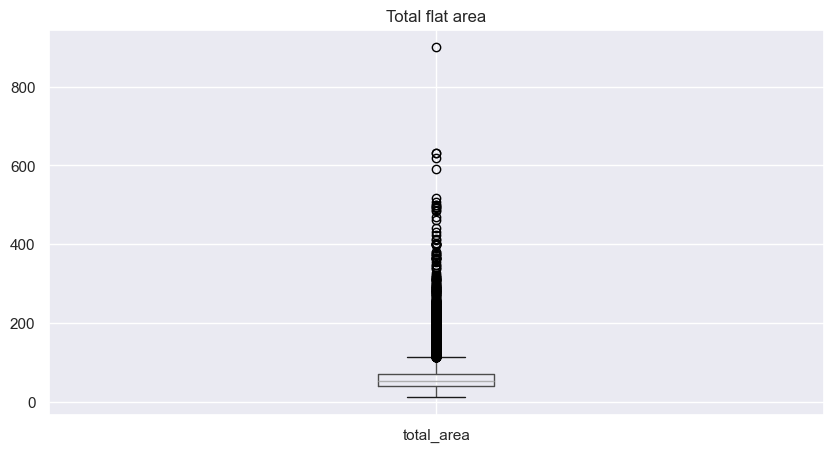

median: 52.0 
mean: 60.3 
min: 12.0 
max: 900.0 
upper outlier threshold: 114.25 
lower outlier threshold: -4.55 
Q1: 40.0 
Q3: 69.7


In [224]:
data_boxplot(data, 'total_area', 'Total flat area')

There's a significant number of outliers: all properties with an area greater than 114.25 m². We also notice that the apartment sizes start from 12 m², while the recommended minimum area for an apartment is 28 m². Let's check how many such apartments are in our dataset.

In [225]:
print(f"number of microflats: {len(data.query('total_area < 28'))} \n"
      f"percentage of the total sample: {len(data.query('total_area < 28')) / len(data) * 100} \n \n"
      f"number of large flats: {len(data.query('total_area > 114.25'))} \n"
      f"percentage of the total sample: {len(data.query('total_area > 114.25')) / len(data) * 100}"
      )

number of microflats: 392 
percentage of the total sample: 1.6575052854122623 
 
number of large flats: 1244 
percentage of the total sample: 5.260042283298097


We will keep microflats in the dataset: first, they are not outliers, and second, recommended norms are not always followed—such apartments can be found in serviced apartments, dormitories, converted communal flats, and new buildings.

There are significantly more extremely large apartments—5.26%. However, we will not remove these rows but will note the data slice that needs to be applied before analyzing the correlation between price and apartment size.

#### 4.1.2. LIVING_AREA

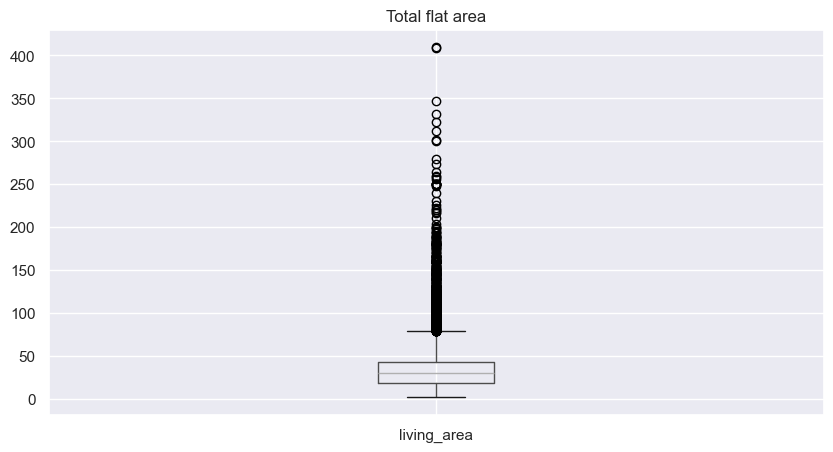

median: 30.3 
mean: 34.3 
min: 2.0 
max: 409.7 
upper outlier threshold: 79.15 
lower outlier threshold: -18.05 
Q1: 18.4 
Q3: 42.7


In [226]:
data_boxplot(data, 'living_area', 'Total flat area')

Previously, we kept apartments with a total area of 12–28 m² in the dataset, assuming they could be microflats. However, even for extremely small units, a living area of 2 m² seems unrealistic.

Based on data about microflat layouts, we'll set the minimum living area at 7 m². Let's calculate the number and proportion of candidates for removal.

In [227]:
print(f"number of microflats: {len(data.query('living_area < 7'))} \n"
      f"percentage of the total sample: {len(data.query('living_area < 7')) / len(data) * 100} \n \n"
      f"number of large flats: {len(data.query('living_area > 75.75'))} \n"
      f"percentage of the total sample: {len(data.query('living_area > 75.75')) / len(data) * 100}"
      )

number of microflats: 8 
percentage of the total sample: 0.03382663847780126 
 
number of large flats: 878 
percentage of the total sample: 3.712473572938689


We'll keep the data unchanged but, as in the previous step, note the range for filtering when analyzing correlations: `7 ≤ living_area ≤ 75.75`.

#### 4.1.3 KITCHEN_AREA

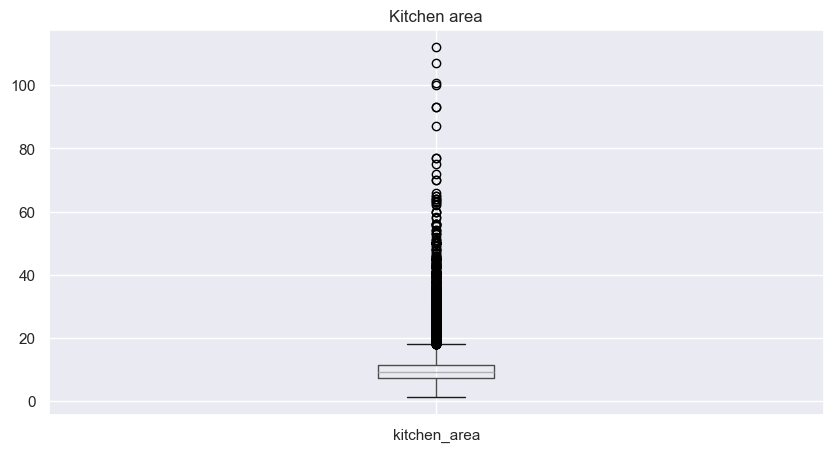

median: 9.2 
mean: 10.5 
min: 1.3 
max: 112.0 
upper outlier threshold: 18.05 
lower outlier threshold: 0.85 
Q1: 7.3 
Q3: 11.6


In [228]:
data_boxplot(data, 'kitchen_area', 'Kitchen area')

Let's check the number of outliers among apartments with exceptionally large kitchens.

In [229]:
print(f"number of large kitchens: {len(data.query('kitchen_area > 18.05'))} \n"
      f"percentage of the total sample: {len(data.query('kitchen_area > 18.05')) / len(data) * 100}"
      )

number of large kitchens: 1461 
percentage of the total sample: 6.177589852008457


Before making a decision, let's check the total area of these apartments.

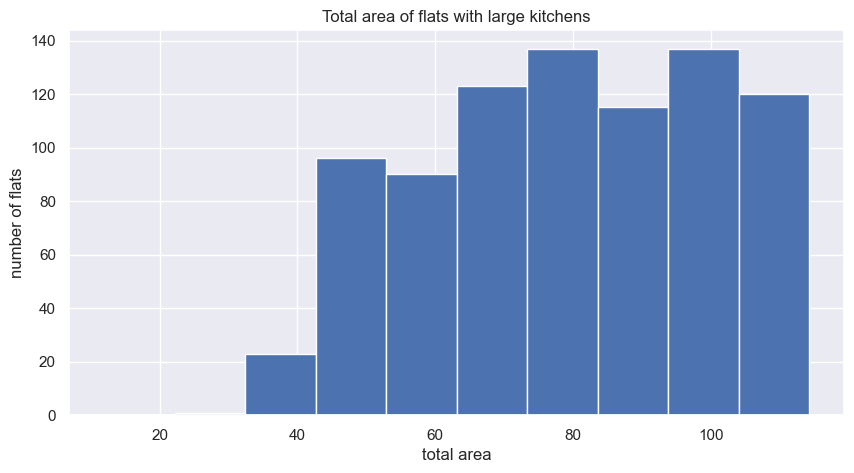

median: 105.2 
mean: 125.0 
upper outlier threshold: 257.2 
lower outlier threshold: -33.2


In [230]:
data_big_kitchen = data.query('kitchen_area > 18.05')

data_hist(data_big_kitchen, 'total_area', 'Total area of flats with large kitchens',
         'total area', 'number of flats', 10, (12, 114.25))

We won't remove these observations from the dataset, but we'll filter them out when analyzing the correlation between price and kitchen area.

#### 4.1.4 LAST_PRICE

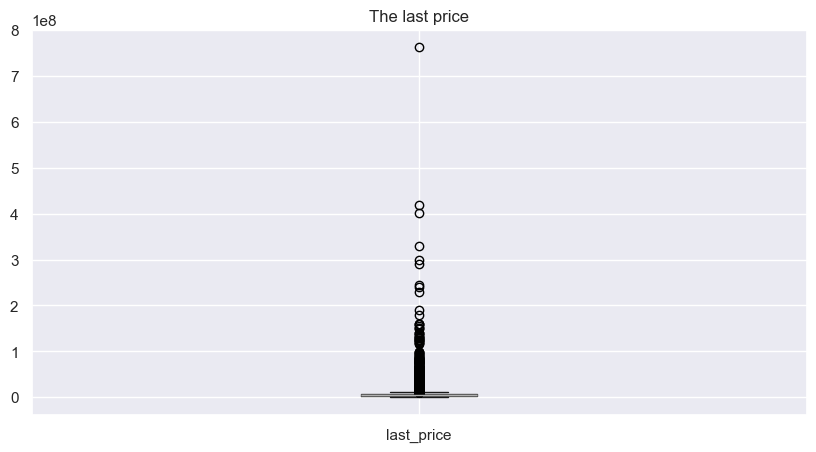

median: 4650000.0 
mean: 6541126.9 
min: 12190.0 
max: 763000000.0 
upper outlier threshold: 11897500.0 
lower outlier threshold: -1698500.0 
Q1: 3400000.0 
Q3: 6799000.0


In [231]:
data_boxplot(data, 'last_price', 'The last price')

Let's check the number of apartments with unreasonably high prices as well as those with suspiciously low prices.

In [232]:
print(f"number of extreamly cheap flats: {len(data.query('last_price < 500000'))} \n"
      f"percentage of the total sample: {len(data.query('last_price < 500000')) / len(data) * 100} \n \n"
      f"number of extreamly expensive flats: {len(data.query('last_price > 11897500'))} \n"
      f"percentage of the total sample: {len(data.query('last_price > 11897500')) / len(data) * 100}"
      )

number of extreamly cheap flats: 14 
percentage of the total sample: 0.05919661733615222 
 
number of extreamly expensive flats: 2055 
percentage of the total sample: 8.6892177589852


Let's check which localities have apartments priced below half a million rubles.

In [233]:
data.query('last_price < 500000').groupby('correct_names')['last_price'].min()

correct_names
Санкт-Петербург                12190.0
Сланцы                        430000.0
городской посёлок Будогощь    450000.0
деревня Вахнова Кара          450000.0
деревня Выскатка              470000.0
деревня Старополье            440000.0
деревня Ям-Тесово             450000.0
посёлок Совхозный             470000.0
посёлок станции Свирь         430000.0
Name: last_price, dtype: float64

We'll remove the apartment in Saint Petersburg listed for 12,190.0, as it's clearly a pricing error. Additionally, we'll exclude unreasonably expensive apartments, as this key parameter could significantly impact correlations with other property characteristics.

In [234]:
data = data.query('12190 < last_price <= 11897500')
print(f"the least expensive flat : {data['last_price'].min()} \n"
      f"the most expensive flat: {data['last_price'].max()}")

the least expensive flat : 430000.0 
the most expensive flat: 11894400.0


#### 4.1.5 ROOMS
By removing outliers among flats with extremely large areas and unreasonably high prices, we have most likely eliminated apartments with an unusually high number of rooms. Let's check how many rooms the remaining apartments in the dataset have after these adjustments.

rooms
1    7996
2    7584
3    4930
4     754
0     195
5     118
6      16
7       1
Name: count, dtype: int64

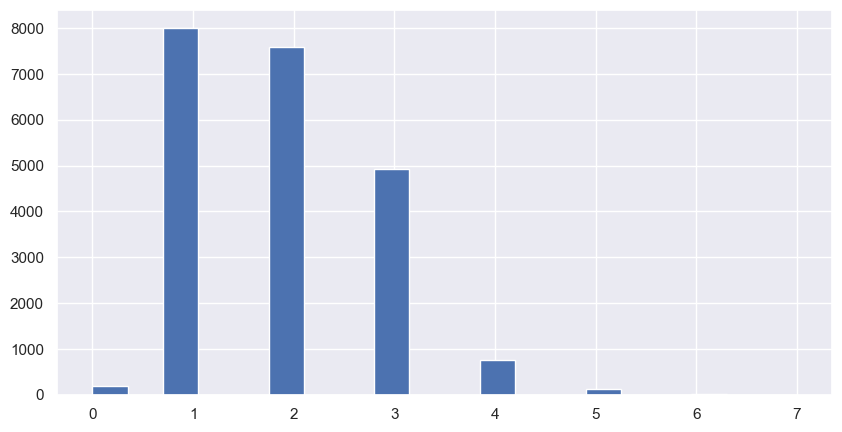

In [235]:
data['rooms'].hist(bins=20)
data['rooms'].value_counts()

The data distribution looks reasonable, with the majority of the dataset consisting of one- and two-room apartments. Now, let's take a look at apartments with 5, 6, and 7 rooms.

In [236]:
data.query('rooms >= 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price,weekday,month,year,floor_type,city_center_km
52,20,11795000.0,136.0,2017-09-22,6,3.00,2.0,94.0,2,NaN,...,0.0,NaN,NaN,Санкт-Петербург,86727,4,9,2017,последний,6.6
106,9,10500000.0,124.1,2017-05-25,5,3.20,4.0,79.4,3,NaN,...,0.0,NaN,6.0,Санкт-Петербург,84609,3,5,2017,другой,5.5
201,5,10880000.0,123.1,2015-11-12,6,3.20,5.0,89.0,2,NaN,...,0.0,NaN,992.0,Санкт-Петербург,88383,3,11,2015,другой,3.4
458,9,4200000.0,106.0,2018-10-05,5,NaN,5.0,75.8,1,NaN,...,NaN,NaN,NaN,посёлок городского типа Лебяжье,39622,4,10,2018,первый,NaN
495,1,10400000.0,104.0,2015-09-20,5,3.50,6.0,70.0,4,NaN,...,1.0,145.0,702.0,Санкт-Петербург,100000,6,9,2015,другой,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,11,10500000.0,110.0,2018-06-30,6,3.20,7.0,75.0,6,NaN,...,0.0,NaN,NaN,Санкт-Петербург,95454,5,6,2018,другой,4.4
23102,0,5800000.0,66.0,2017-06-09,5,NaN,5.0,55.5,1,NaN,...,0.0,NaN,21.0,Санкт-Петербург,87878,4,6,2017,первый,11.9
23305,9,4950000.0,67.0,2018-10-29,5,2.60,5.0,51.2,1,NaN,...,0.0,NaN,89.0,Санкт-Петербург,73880,0,10,2018,первый,12.0
23427,10,7600000.0,104.0,2017-11-28,5,2.87,7.0,69.0,7,NaN,...,1.0,569.0,74.0,Санкт-Петербург,73076,1,11,2017,последний,3.8


From the perspective of room count, these observations are outliers. However, other characteristics may still be useful for analyzing relationships. When examining the correlation between price and room count, we will use a filtered dataset.

Now, let's take a look at the 193 properties with zero rooms.

In [237]:
print(f"number of studio apartments among flats with 0 rooms: \n"
      f"{data.query('rooms == 0')['studio'].value_counts()} \n \n"
      f"number of rooms in studio apartments: \n"
      f"{data.query('studio == True')['rooms'].value_counts()} \n \n"
      f"number of studio apartments in dataset: {len(data.query('studio == True'))}"
     )

number of studio apartments among flats with 0 rooms: 
studio
True     137
False     58
Name: count, dtype: int64 
 
number of rooms in studio apartments: 
rooms
0    137
1     11
Name: count, dtype: int64 
 
number of studio apartments in dataset: 148


146 people in the dataset honestly stated that their apartment is a studio with 0 rooms. However, we don’t know how many one-room apartments are actually studios. To eliminate the outlier, we will replace all zeros with ones and plot the graph again.

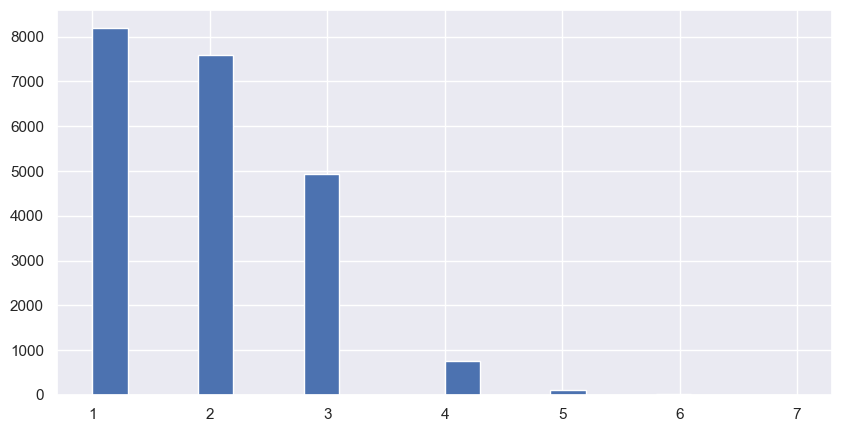

In [238]:
data.loc[data['rooms'] == 0, 'rooms'] = 1
data['rooms'].hist(bins=20)
plt.show()

#### 4.1.6 СEILING_HEIGHT

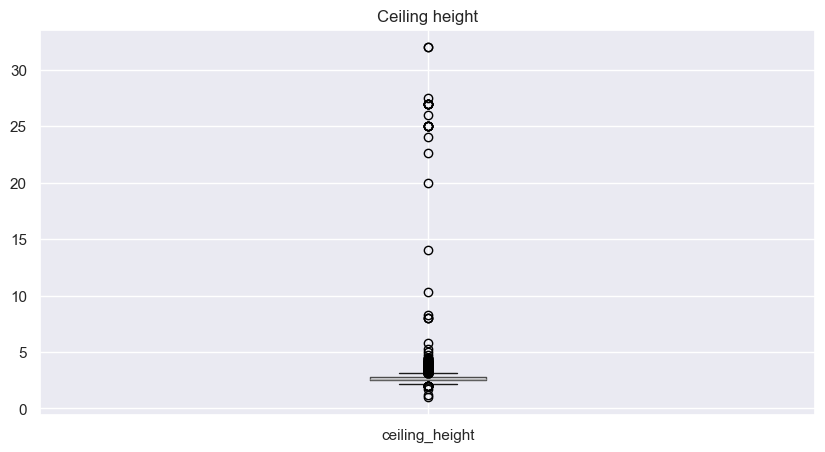

median: 2.6 
mean: 2.7 
min: 1.0 
max: 32.0 
upper outlier threshold: 3.25 
lower outlier threshold: 2.05 
Q1: 2.5 
Q3: 2.8


In [239]:
data_boxplot(data, 'ceiling_height', 'Ceiling height')

We observe an abundance of outliers on both sides of the boxplot whiskers. Let's start by examining the upper outliers. We'll look at the unique ceiling height values above 3.25 meters.

In [240]:
data.query('ceiling_height > 3.25')['ceiling_height'].sort_values(ascending=False)

3148     32.00
22336    32.00
21377    27.50
10773    27.00
5246     27.00
         ...  
5190      3.27
7395      3.26
18965     3.26
14701     3.26
14472     3.26
Name: ceiling_height, Length: 405, dtype: float64

The highest ceiling height is 32 meters. It's evident that the user missed a decimal point when entering the data. Let's find ceiling height values starting from 10 meters and divide them by 10.

In [241]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=10 else x)

data.query('ceiling_height > 3.24')['ceiling_height'].sort_values(ascending=False)

5863     8.30
17442    8.00
3474     8.00
15743    8.00
21227    5.80
         ... 
4853     3.25
13754    3.25
17936    3.25
3840     3.25
135      3.25
Name: ceiling_height, Length: 410, dtype: float64

To filter out unreliable values, let's refer to historical data: in St. Petersburg's old housing stock, the ceiling height of main living spaces could reach up to 5.1 meters. Let's check how many observations in the dataset exceed this threshold.

In [242]:
data.query('ceiling_height > 5.21')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price,weekday,month,year,floor_type,city_center_km
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,NaN,NaN,125.0,деревня Нурма,46666,4,3,2018,другой,NaN
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,...,1.0,613.0,14.0,Санкт-Петербург,125555,2,8,2018,другой,10.8
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5.0,17.6,5,NaN,...,1.0,92.0,8.0,Санкт-Петербург,78000,3,3,2018,последний,3.9
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,NaN,...,0.0,NaN,474.0,Санкт-Петербург,83582,4,11,2016,первый,11.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,NaN,...,0.0,NaN,469.0,Красное Село,99074,1,6,2015,другой,28.1
21227,0,8200000.0,71.0,2017-07-21,1,5.8,5.0,68.0,5,NaN,...,3.0,366.0,30.0,Санкт-Петербург,115492,4,7,2017,последний,1.3


There are only six such properties, all with anomalies: two apartments with 8-meter ceilings in a 16-story building and one listing with 0 rooms on the top floor of a 5-story building. These can be removed from the dataset.

In [243]:
data = data.query('ceiling_height <= 5.21 or ceiling_height.isna()')
data.shape

(21588, 29)

Let's analyze the apartments with ceiling heights below the established minimum of 2.5 meters.

In [244]:
print(f"persentage of the total flats number: {len(data.query('ceiling_height < 2.5')) / len(data) * 100} \n \n"
      f"descriptive statistics for the column: \n{data.query('ceiling_height < 2.5')['ceiling_height'].describe()}"
     )

persentage of the total flats number: 0.35667963683527887 
 
descriptive statistics for the column: 
count    77.000000
mean      2.281039
std       0.316521
min       1.000000
25%       2.300000
50%       2.400000
75%       2.450000
max       2.490000
Name: ceiling_height, dtype: float64


A total of 77 observations, or 0.61% of the dataset. These observations can be removed from the dataset.

In [245]:
data = data.query('ceiling_height >= 2.5 or ceiling_height.isna()')
data.shape

(21511, 29)

#### 4.1.7 FLOORS_TOTAL

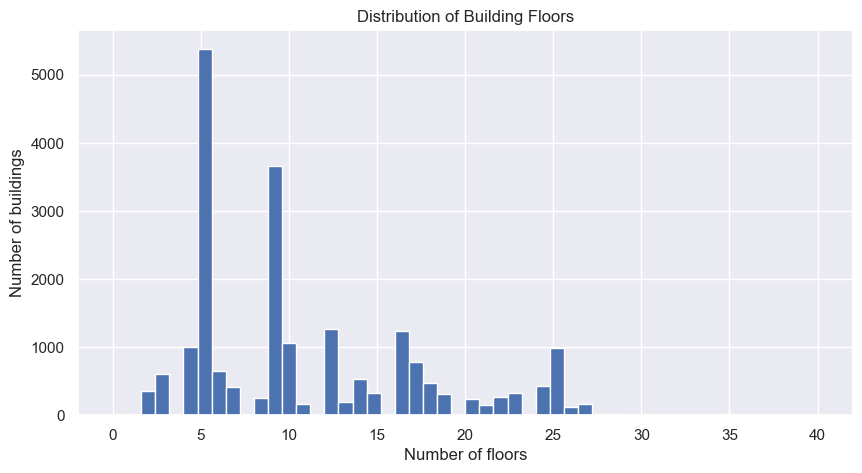

In [246]:
data['floors_total'].hist(bins=50, range=(0, 40))
plt.title('Distribution of Building Floors')
plt.xlabel('Number of floors')
plt.ylabel('Number of buildings')
plt.show()

Buildings taller than 30 floors can be considered outliers. Let's examine this subset of data before removal.

In [247]:
data.query('floors_total > 30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price,weekday,month,year,floor_type,city_center_km
397,15,5990000.0,54.0,2018-03-22,2,NaN,36.0,21.4,28,NaN,...,3.0,80.0,11.0,Санкт-Петербург,110925,3,3,2018,другой,20.4
871,14,7777777.0,75.0,2017-11-16,2,NaN,35.0,40.5,23,NaN,...,3.0,80.0,169.0,Санкт-Петербург,103703,3,11,2017,другой,20.4
1060,10,5200000.0,50.0,2015-11-06,2,NaN,35.0,39.0,15,False,...,3.0,80.0,281.0,Санкт-Петербург,104000,4,11,2015,другой,20.4
1697,11,3550000.0,28.0,2018-02-08,1,2.65,34.0,18.0,23,NaN,...,3.0,80.0,410.0,Санкт-Петербург,126785,3,2,2018,другой,20.4
1917,13,10150000.0,74.0,2017-11-17,2,2.80,35.0,34.4,30,NaN,...,3.0,80.0,NaN,Санкт-Петербург,137162,4,11,2017,другой,20.4
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,...,3.0,614.0,166.0,Кронштадт,83516,3,6,2018,другой,49.5
2966,9,4300000.0,37.0,2017-08-08,1,NaN,35.0,14.0,15,NaN,...,3.0,80.0,50.0,Санкт-Петербург,116216,1,8,2017,другой,20.4
4855,12,5500000.0,50.0,2017-06-22,1,2.80,35.0,22.0,4,NaN,...,3.0,145.0,537.0,Санкт-Петербург,110000,3,6,2017,другой,20.3
5749,20,3590000.0,25.0,2017-08-30,1,2.80,35.0,18.0,26,NaN,...,3.0,80.0,198.0,Санкт-Петербург,143600,2,8,2017,другой,20.4
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36.0,41.0,13,NaN,...,3.0,80.0,38.0,Санкт-Петербург,101875,2,1,2019,другой,20.4


All properties are located in St. Petersburg. These properties are quite far from the city center, making it clear that they are located in newly developed areas. Although there aren't many of them, they shouldn't be removed, as their key parameters do not indicate outliers. In further analysis of the correlation between price and building height, we will create a filtered dataset excluding these observations.

####  4.1.8 FLOOR_TYPE

floor_type
другой       15759
последний     2969
первый        2783
Name: count, dtype: int64

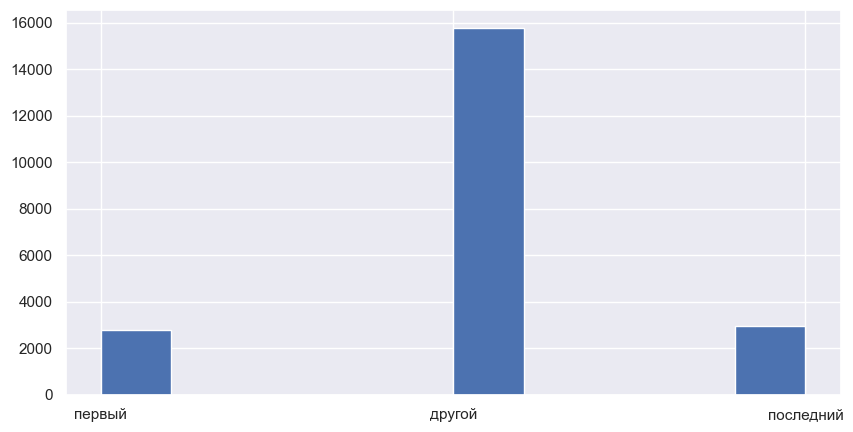

In [248]:
data['floor_type'].hist(bins=10)
data['floor_type'].value_counts()

Overall, the distribution looks reasonable: there should be significantly fewer properties located on neither the first nor the last floor. When analyzing the correlation between price and floor level, we will extract a subset from the "other" category that matches the size of the two other groups.

#### 4.1.9 CITY_CENTERS_NEAREST

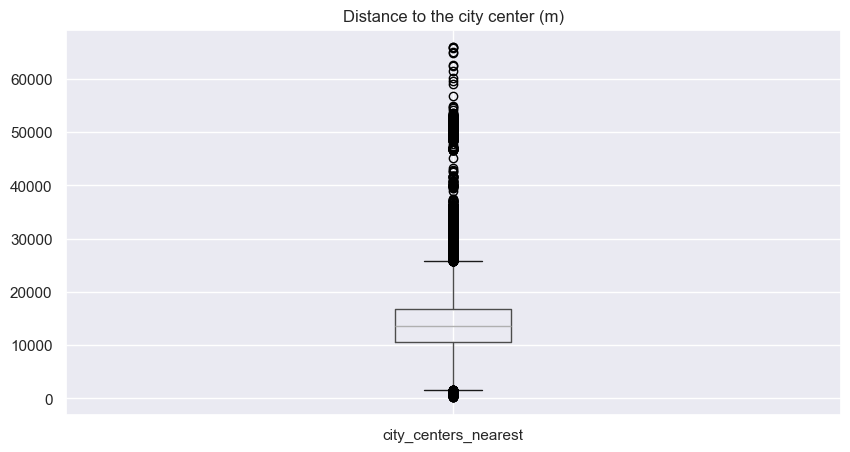

median: 13630.0 
mean: 14986.4 
min: 208.0 
max: 65968.0 
upper outlier threshold: 25845.75 
lower outlier threshold: 1511.75 
Q1: 10637.0 
Q3: 16720.5


In [249]:
data_boxplot(data, 'city_centers_nearest', 'Distance to the city center (m)')

In [250]:
print(f"number of flats: {len(data.query('city_centers_nearest < 2150 or city_centers_nearest > 25138.8'))} \n"
      f"Persentage of total flats number: "
      f"{len(data.query('city_centers_nearest < 2150 or city_centers_nearest > 25138.8')) / len(data) * 100} \n"
      )

data.query('city_centers_nearest < 2150 or city_centers_nearest > 25138.8')

number of flats: 2069 
Persentage of total flats number: 9.618334805448375 



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price,weekday,month,year,floor_type,city_center_km
11,9,3300000.0,44.0,2018-08-27,2,NaN,5.0,31.0,4,False,...,0.0,NaN,7.0,Ломоносов,75000,0,8,2018,другой,51.7
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,...,3.0,298.0,366.0,Петергоф,82943,5,7,2017,последний,33.1
14,1,4400000.0,36.0,2016-06-23,1,NaN,6.0,17.0,1,NaN,...,1.0,96.0,203.0,Пушкин,122222,3,6,2016,первый,30.8
28,8,4170000.0,44.0,2017-12-13,1,2.90,6.0,20.8,1,NaN,...,1.0,118.0,74.0,Пушкин,94772,2,12,2017,первый,30.7
33,8,4800000.0,73.0,2018-10-15,4,NaN,9.0,51.6,5,NaN,...,0.0,NaN,92.0,Колпино,65753,0,10,2018,другой,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23667,14,9990000.0,90.0,2017-01-23,3,3.06,17.0,55.0,9,False,...,1.0,545.0,86.0,Сестрорецк,111000,0,1,2017,другой,33.3
23669,8,3000000.0,34.1,2017-11-10,1,NaN,9.0,17.0,3,NaN,...,1.0,741.0,74.0,Колпино,87976,4,11,2017,другой,30.5
23678,10,3500000.0,43.0,2016-05-19,2,2.50,3.0,26.1,2,False,...,1.0,1134.0,252.0,Пушкин,81395,3,5,2016,другой,28.0
23685,15,2490000.0,31.0,2019-01-24,1,2.50,5.0,17.3,5,NaN,...,0.0,NaN,NaN,Ломоносов,80322,3,1,2019,последний,51.8


We won't eliminate 10.1% of the sample, especially since these objects are not outliers in other key metrics. Therefore, when analyzing the relationship between price and distance from the city, we will simply use a filtered subset.

#### 4.1.10 PARKS_NEAREST

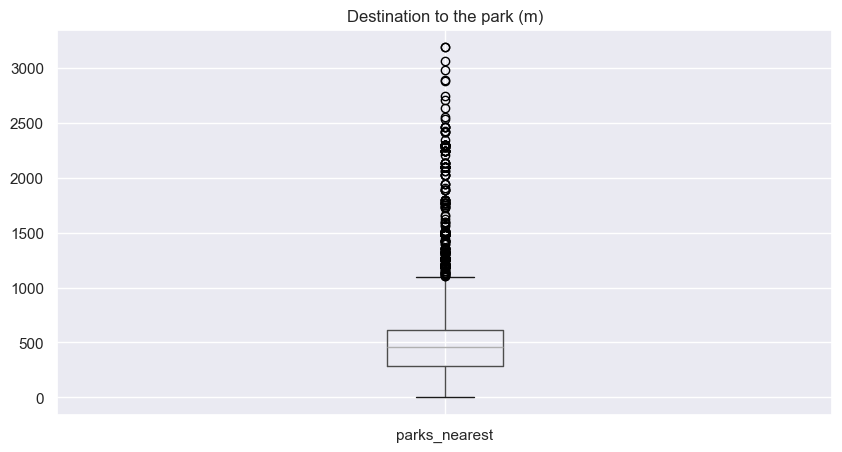

median: 455.0 
mean: 487.7 
min: 1.0 
max: 3190.0 
upper outlier threshold: 1100.5 
lower outlier threshold: -199.5 
Q1: 288.0 
Q3: 613.0


In [251]:
data_boxplot(data, 'parks_nearest', 'Destination to the park (m)')

In [252]:
print(f"number of parks: {len(data.query('parks_nearest > 1079.5'))} \n"
      f"persentage of total amount: "
      f"{len(data.query('parks_nearest > 1079.5')) / len(data) * 100} \n"
      )

data.query('parks_nearest > 1079.5')

number of parks: 253 
persentage of total amount: 1.1761424387522663 



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price,weekday,month,year,floor_type,city_center_km
195,8,5300000.0,60.0,2016-05-19,3,NaN,9.0,45.00,4,NaN,...,3.0,239.0,372.0,Санкт-Петербург,88333,3,5,2016,другой,17.1
196,7,8715960.0,57.0,2017-06-29,1,NaN,5.0,20.00,5,NaN,...,2.0,97.0,119.0,Санкт-Петербург,152911,3,6,2017,последний,16.5
323,6,9591727.0,72.0,2017-06-29,2,2.80,10.0,34.00,9,NaN,...,1.0,534.0,118.0,Санкт-Петербург,133218,3,6,2017,другой,5.4
371,11,7300000.0,65.0,2018-09-12,2,NaN,12.0,30.04,2,NaN,...,2.0,372.0,92.0,Санкт-Петербург,112307,2,9,2018,другой,17.6
438,6,7410000.0,70.0,2017-06-29,2,NaN,12.0,30.50,5,NaN,...,1.0,534.0,229.0,Санкт-Петербург,105857,3,6,2017,другой,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22870,13,9800000.0,88.7,2018-10-04,3,2.80,12.0,49.00,7,NaN,...,2.0,480.0,60.0,Санкт-Петербург,110484,3,10,2018,другой,7.6
23080,15,4650000.0,44.5,2018-02-20,2,NaN,5.0,25.20,2,NaN,...,1.0,284.0,152.0,Санкт-Петербург,104494,1,2,2018,другой,9.9
23159,2,7952000.0,64.0,2018-07-05,2,2.75,10.0,37.00,3,NaN,...,1.0,534.0,54.0,Санкт-Петербург,124250,3,7,2018,другой,5.4
23426,17,8778000.0,47.5,2014-12-29,1,3.00,7.0,17.60,4,NaN,...,3.0,204.0,1360.0,Санкт-Петербург,184800,0,12,2014,другой,10.2


253 objects (1% of observations) are outliers only for this characteristic. Just like with the distance to the city center, we will not remove these objects but will use a filtered subset in further analysis.

### 4.2 Скорость продажи квартиры
How long does it take to sell a flat? To get an overall picture, let's visualize the distribution on a graph.

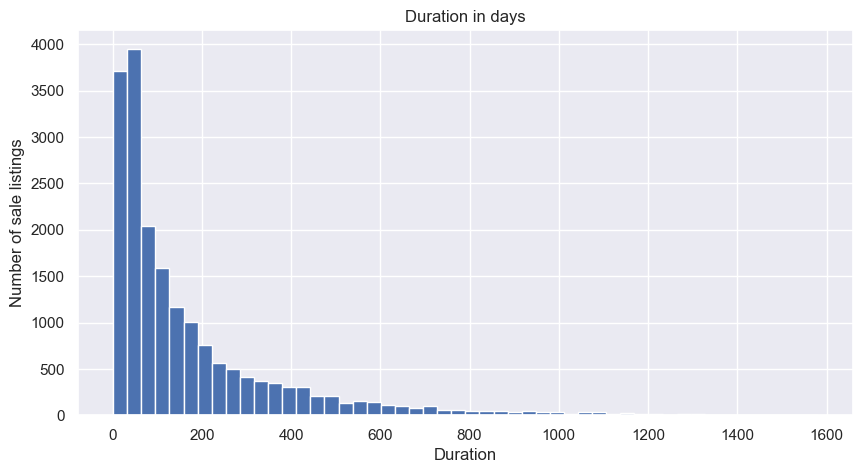

median: 91.0 
mean: 173.2 
upper outlier threshold: 481.5 
lower outlier threshold: -218.5


In [253]:
data_hist(data, 'days_exposition', 
          'Duration in days', 
          'Duration', 'Number of sale listings',
          50, (data['days_exposition'].min(), data['days_exposition'].max()))

Listings active for more than 480 days are outliers. They were either not removed in time or are "difficult" properties (overpriced, poorly located, or lacking information). We'll take the corresponding data slice.

In [254]:
data.query('days_exposition > 480')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,correct_names,sq_meter_price,weekday,month,year,floor_type,city_center_km
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,2.0,574.0,558.0,Санкт-Петербург,92785,3,8,2015,другой,13.9
17,6,4180000.0,36.00,2016-09-09,1,NaN,17.0,16.5,7,NaN,...,1.0,859.0,571.0,Санкт-Петербург,116111,4,9,2016,другой,14.6
23,11,2950000.0,32.00,2016-10-29,1,2.60,9.0,17.7,9,NaN,...,1.0,190.0,615.0,Санкт-Петербург,92187,5,10,2016,последний,14.2
43,13,9330000.0,48.00,2017-01-10,2,3.00,4.0,28.0,4,NaN,...,1.0,492.0,763.0,Санкт-Петербург,194375,1,1,2017,последний,10.8
61,18,7990000.0,74.00,2017-08-24,2,NaN,4.0,43.0,4,NaN,...,0.0,NaN,609.0,Санкт-Петербург,107972,3,8,2017,последний,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000.0,110.00,2015-12-10,4,3.36,7.0,64.6,5,NaN,...,1.0,118.0,816.0,Санкт-Петербург,81818,3,12,2015,другой,5.0
23672,5,3000000.0,30.80,2016-06-08,1,NaN,5.0,16.1,3,NaN,...,0.0,NaN,808.0,Санкт-Петербург,97402,2,6,2016,другой,14.2
23675,8,3550000.0,39.50,2016-10-03,1,NaN,16.0,19.0,13,NaN,...,0.0,NaN,721.0,Санкт-Петербург,89873,0,10,2016,другой,15.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,NaN,...,1.0,806.0,519.0,Санкт-Петербург,129903,3,10,2016,другой,4.5


1,599 properties out of 23,699 were on the market for over 480 days—6.7% of the dataset. We won’t remove these entries but will keep this flag in mind.  
Before creating a box plot, let's zoom in on the graph to examine the distribution of outliers.

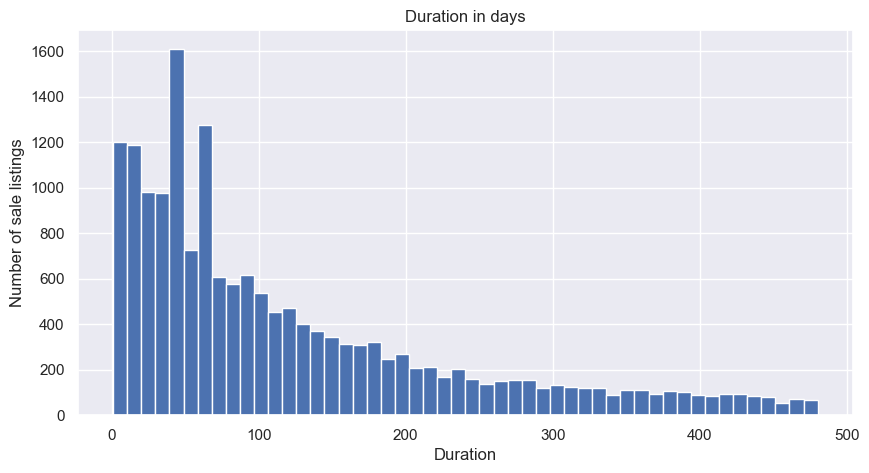

median: 79.0 
mean: 121.5 
upper outlier threshold: 376.5 
lower outlier threshold: -163.5


In [255]:
data_expo = data.query('days_exposition <= 480')

data_hist(data_expo, 'days_exposition', 
          'Duration in days', 
          'Duration', 'Number of sale listings',
          50, (data_expo['days_exposition'].min(), 480))

On the fast-sale side, we observe two peaks, one of which is suspiciously close to zero. Let's take a closer look at the left side of the graph by limiting it to the median value.

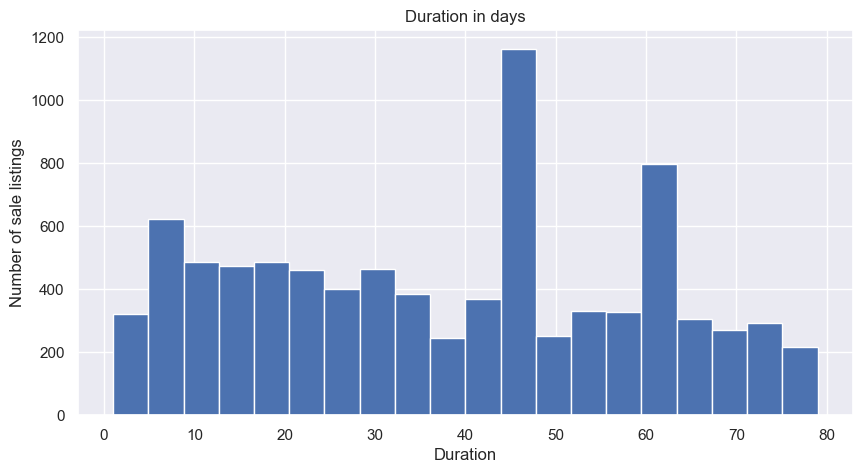

median: 79.0 
mean: 121.5 
upper outlier threshold: 376.5 
lower outlier threshold: -163.5


In [256]:
data_hist(data_expo, 'days_exposition', 
          'Duration in days', 
          'Duration', 'Number of sale listings',
          20, (data_expo['days_exposition'].min(), 79))

On the enlarged graph, we see spikes in sale durations around 45 and 60 days. This can be explained by the automated removal of listings: according to platform rules, the posting duration depends on the property's price—45, 60, and 90 days—the more expensive the property, the longer it stays listed.

To assess fast sales, we'll create a box plot: anything between Q1 and the lower outlier threshold will be considered too fast, while anything between Q3 and the upper threshold will be considered too slow.

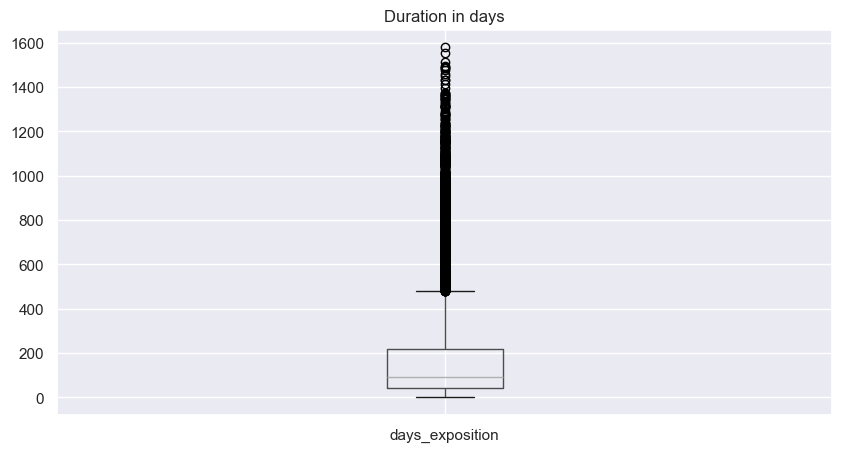

median: 91.0 
mean: 173.2 
min: 1.0 
max: 1580.0 
upper outlier threshold: 481.5 
lower outlier threshold: -218.5 
Q1: 44.0 
Q3: 219.0


In [257]:
data_boxplot (data, 'days_exposition', 'Duration in days')

In [258]:
# creating two datasets to store median values for different groups: 
# super_fast for extremely fast sales and normal for typical sales.

super_fast = (data.query('days_exposition < 44 and locality_name == "Санкт-Петербург"')
.pivot_table(index='days_exposition', 
            values=['last_price', 'city_center_km', 'total_area', 'total_images', 'month'],
            aggfunc=['median'])
.reset_index()
             )
              
normal = (data.query('44 <= days_exposition <= 219 and locality_name == "Санкт-Петербург"')
.pivot_table(index='days_exposition', 
            values=['last_price', 'city_center_km', 'total_area', 'total_images', 'month'],
            aggfunc=['median'])
.reset_index()
)

# merging the datasets into one to compare the metrics
norm_vs_fast = pd.concat([super_fast, normal], axis='columns')
norm_vs_fast.head(15)

days_exposition         median                                           \
                   city_center_km last_price month total_area total_images   
0              1.0          14.40  4000000.0   5.0       49.9         19.0   
1              2.0          10.30  6100000.0   4.0       45.1          4.0   
2              3.0          12.30  4550000.0   8.0       45.5         10.0   
3              4.0          12.40  4700000.0   7.0       50.4          7.0   
4              5.0          12.55  4500000.0   6.0       46.6          9.0   
5              6.0          12.70  4515000.0   8.0       46.0         10.5   
6              7.0          13.10  4800000.0   7.0       45.0          9.0   
7              8.0          13.40  4500000.0   8.0       44.0         10.0   
8              9.0          12.80  4390000.0   7.0       44.1          9.0   
9             10.0          13.20  4550000.0   8.0       45.0         10.0   
10            11.0          12.90  5000000.0   8.0       48.2          9.0   
11            12.0          12.30  4700000.0   9.0       45.5          9.0   
12            13.0          13.05  4725000.0   7.0       49.0          9.5   
13            14.0          13.20  4950000.0   7.0       49.3          9.0   
14            15.0          12.70  4960000.0   6.0       46.0          9.0   

   days_exposition         median                                           
                   city_center_km last_price month total_area total_images  
0             44.0          13.40  4150000.0   7.0      44.00          7.0  
1             45.0          13.70  3850000.0   6.0      40.00          7.0  
2             46.0          13.40  4212500.0   7.0      39.80         10.0  
3             47.0          13.15  4820000.0   6.5      47.35          9.0  
4             48.0          12.70  4990000.0   8.0      48.30         10.0  
5             49.0          13.10  4650000.0   7.0      46.50         11.0  
6             50.0          13.40  4500000.0   8.0      45.00         12.0  
7             51.0          12.00  4425000.0   9.0      46.75         10.5  
8             52.0          12.60  4699500.0   7.5      46.00         11.0  
9             53.0          12.30  5300000.0   8.0      50.00          9.0  
10            54.0          14.80  4950000.0   6.0      51.40          9.0  
11            55.0          12.70  5000000.0   9.0      50.00         12.0  
12            56.0          14.20  4800000.0   8.0      45.00         10.0  
13            57.0          14.10  4600000.0   7.0      47.10          7.0  
14            58.0          13.65  6000000.0   6.0      59.25          9.5

As expected, apartments with lower prices and similar or shorter distances from the city center sell faster.

Before moving on to the next stage of the study, let's assess the data loss: how many rows were in the dataset at the start, and how many remain after handling missing values, duplicates, and outliers.

In [259]:
missing_data_final = data.isna().sum().to_frame().rename(columns = {0: 'missing_values_final'})

# gathering statistics on the percentage of missing values after handling outliers and missing data.
missing_data_final['total_values_final'] = data.shape[0]
missing_data_final['% of total_final'] = (missing_data_final['missing_values_final'] / data.shape[0] * 100).round(2)

# a new column showing the difference between 
# the percentage of missing values at the start and the current percentage:
missing_data_final['% of total_compare'] = (missing_data_start['% of total_start'] - 
                                           missing_data_final['% of total_final'])

# a new column showing the percentage of data lost during preprocessing:
missing_data_final['total_compare'] = (((23699 - missing_data_final['total_values_final']) / 23699 * 100).round(2))

missing_data_final.sort_values('% of total_compare', ascending=False)

,missing_values_final,total_values_final,% of total_final,% of total_compare,total_compare
balcony,0,21511,0.00,48.61,9.23
kitchen_area,0,21511,0.00,9.61,9.23
living_area,0,21511,0.00,8.03,9.23
days_exposition,2626,21511,12.21,1.21,9.23
locality_name,0,21511,0.00,0.21,9.23
floors_total,73,21511,0.34,0.02,9.23
studio,0,21511,0.00,0.00,9.23
last_price,0,21511,0.00,0.00,9.23
total_images,0,21511,0.00,0.00,9.23
floor,0,21511,0.00,0.00,9.23


**Summary**  
During data preprocessing, we managed to reduce missing values across various columns by 0.21% to 48.61%. Handling outliers led to the removal of 9.23% of the data. To preserve as much useful information as possible, we chose to exclude only observations with extreme values in key metrics (such as property price) or those with outliers combined with unusual characteristics (like ceiling height). In all other cases, we will use data slices when analyzing correlations.

### 4.3 Factors Affecting Property Value
In the next step, we will examine which factors influence property value. We will assess how sensitive the price is to the following characteristics:

* `total_area`
* `living_area`
* `kitchen_area`
* `rooms` — number of rooms
* `floor_type` — floor type (first, last, other)
* `weekday`, `month`, `year` — day, month, and year of listing publication  

**Correlation: Price vs. Total Area**

Before plotting the graph, we will filter the dataset to include only properties with `total_area < 114.25`.

Corr: 0.69


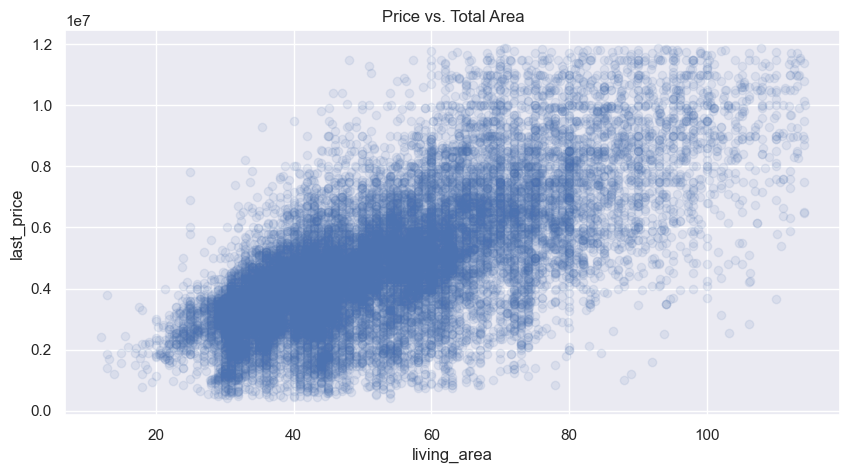

In [260]:
data_scatter(data.query('total_area < 114.25')['total_area'], 
             data.query('total_area < 114.25')['last_price'],
             'Price vs. Total Area', 
             'living_area', 'last_price', 0.1)

The correlation level is acceptable: the larger the total area, the higher the price. The absence of a strongly pronounced linear dependence indicates the influence of additional factors, such as the apartment’s location (the district and, in the case of St. Petersburg, the proximity to metro stations).

**Correlation: Price vs. Living Area**  

During data preprocessing, extreme values were removed from the living_area column, just as they were from last_price. Now, let's examine the correlation between these two characteristics.

Corr: 0.55


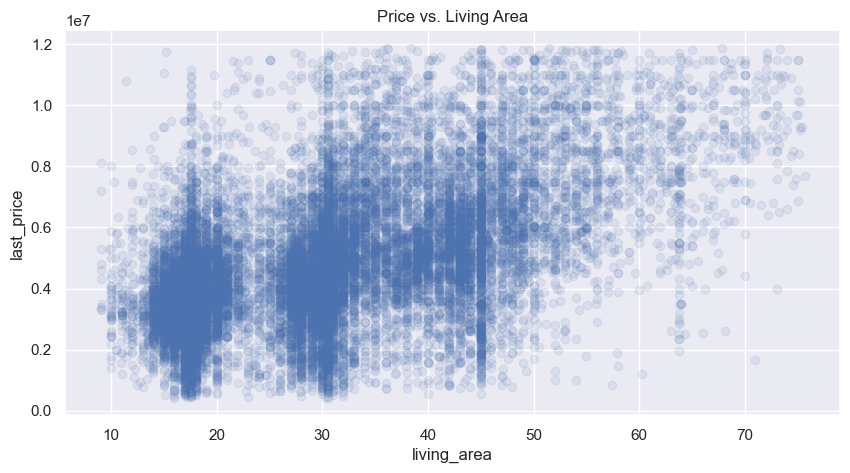

In [261]:
data_scatter(data.query('9 <= living_area <= 75.75')['living_area'], 
             data.query('9 <= living_area <= 75.75')['last_price'], 
             'Price vs. Living Area', 
             'living_area', 'last_price', 0.1)

The correlation level is lower, which can be explained by the influence of additional factors, as well as the presence of missing values and outliers in the original dataset.

**Correlation: Price vs. Kitchen Area**  
As a reminder, during the outlier processing stage, we decided not to exclude them from the dataset but to filter the data based on the number of rooms before plotting the graph.

Corr: 0.47


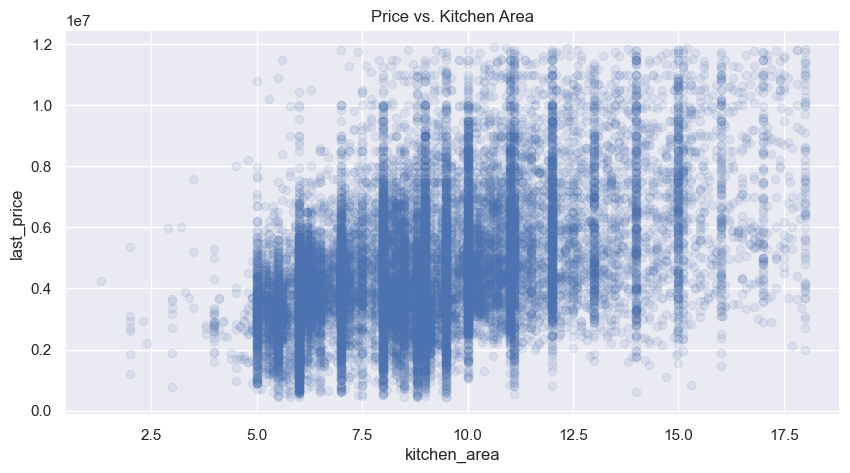

In [262]:
data_scatter(data.query('kitchen_area <= 18.05')['kitchen_area'], 
             data.query('kitchen_area <= 18.05')['last_price'],
             'Price vs. Kitchen Area', 
             'kitchen_area', 'last_price', 0.1)

The correlation level is even lower: 0.47%. The distinct "columns" emerging within the overall data mass are likely a result of filling in missing values with typical figures. Overall, there is a weak correlation between kitchen area and property price, which makes sense: generally, the larger the total apartment area, the more space is allocated to the kitchen.

**Correlation: Price vs. Number of Rooms**  
In this case, we also apply a data slice to filter out outliers: the graph will include only studio apartments and those with 1 to 4 rooms.

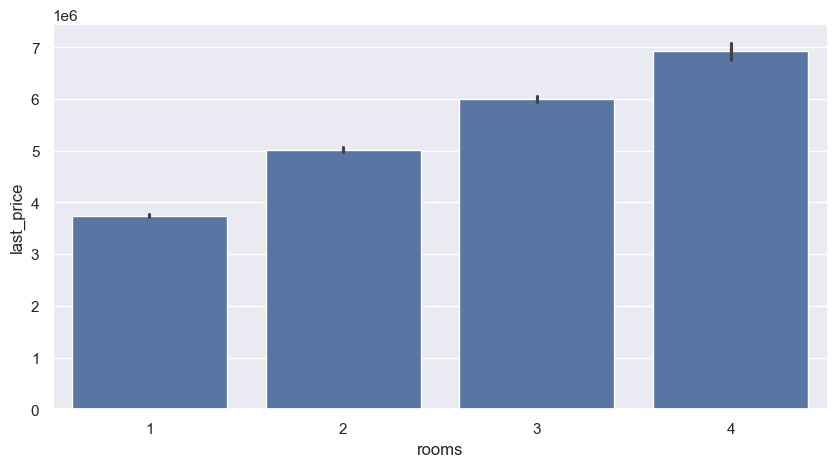

In [263]:
sns.barplot(data=data.query('rooms < 5'), x='rooms', y='last_price')
sns.set(font_scale=1.2)
plt.show()

As expected, the more rooms an apartment has, the higher its price. However, the price difference slightly decreases as the number of rooms increases: the gap between one-room and two-room apartments is larger than between two-room and three-room apartments.

Let's analyze the difference in median values.

In [264]:
for i in range(1, 5):
    if i == 1:
        pass
    else:
        print(f"Price difference between {i-1}-room and {i}-room apartment: "
              f"{data.query('rooms == @i')['last_price'].median() - data.query('rooms == @i-1')['last_price'].median()}"
             )

Price difference between 1-room and 2-room apartment: 1110000.0
Price difference between 2-room and 3-room apartment: 1020000.0
Price difference between 3-room and 4-room apartment: 1250000.0


**Correlation: Price vs. Day of the Week**

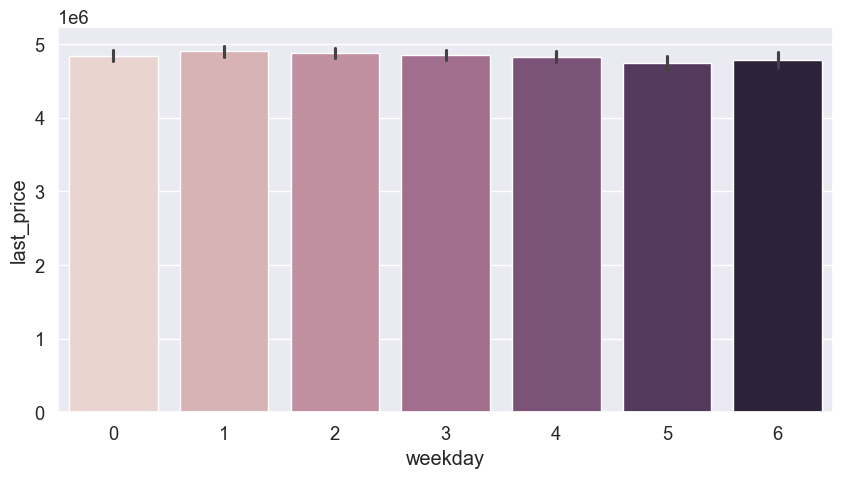

In [265]:
sns.barplot(data=data, x='weekday', y='last_price', hue='weekday', legend=False)
sns.set(font_scale=1.2)
plt.show()

The days of the week are encoded from zero to six, where zero represents Monday.  

As expected, there is no significant correlation between the day of the week and the apartment price. On Saturdays and Sundays, sellers seem more willing to lower prices, but this is not certain (:  

**Correlation: Price vs. Month**

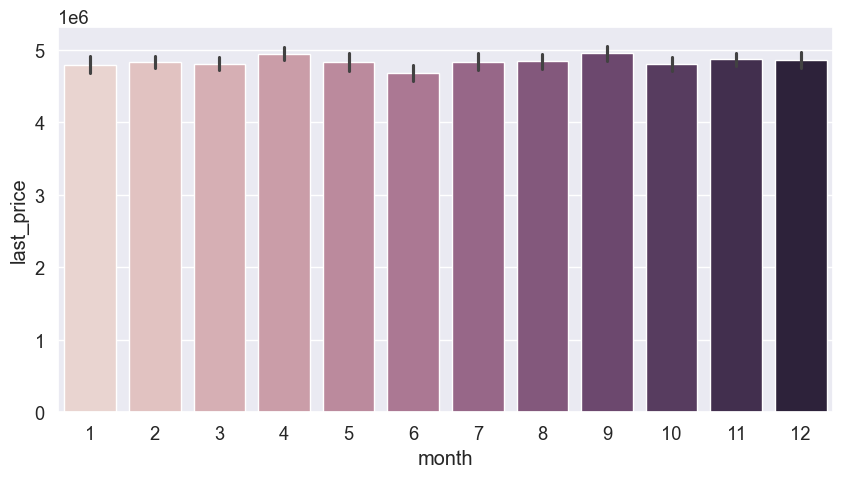

In [266]:
sns.barplot(data=data, x='month', y='last_price', hue='month', legend=False)
sns.set(font_scale=1.2)
plt.show()

There's a slightly more dynamic trend; however, our dataset contains data for only six years, meaning there are only six sets of data for each month. In this case, we cannot confirm whether the month of listing truly affects the apartment price.

**Correlation: Price vs. Year**

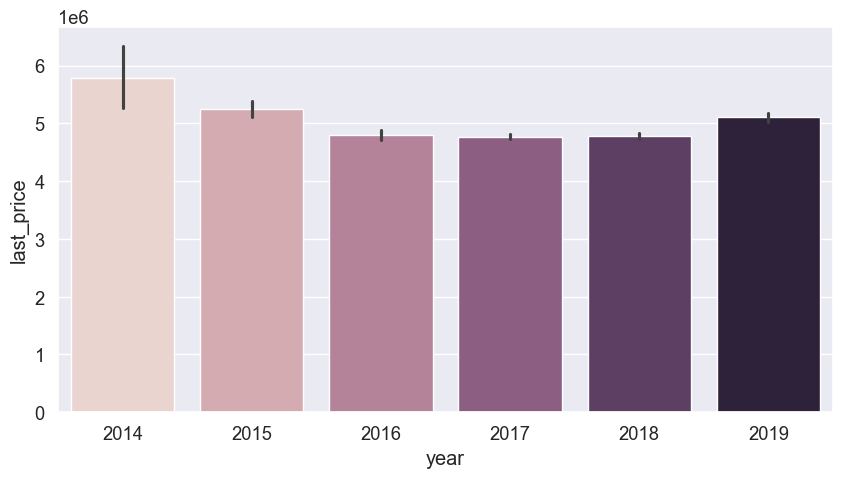

In [267]:
sns.barplot(data=data, x='year', y='last_price', hue='year', legend=False)
sns.set(font_scale=1.2)
plt.show()

We can clearly see a trend of gradual price decline followed by stabilization. However, in this case, external factors not reflected in the dataset should be taken into account. These include the share of newly built apartments on the market, the overall economic situation in the country, banking loan programs, and more.

Before moving on to the interim conclusions, let’s examine one more factor influencing pricing: the floor on which the apartment is located. As we recall, the number of apartments categorized as "other" floor type is nearly five times higher than the number of apartments in the other categories within the dataset. Let’s analyze the distribution of these groups in St. Petersburg, which has the highest number of listings.

In [268]:
data.query('locality_name == "Санкт-Петербург"')['floor_type'].value_counts()

floor_type
другой       10630
последний     1572
первый        1493
Name: count, dtype: int64

For St. Petersburg, the gap between groups is even more pronounced—more than six times larger. To create three approximately equal subgroups, we will randomly select 970 apartments in St. Petersburg with the "other" floor type.

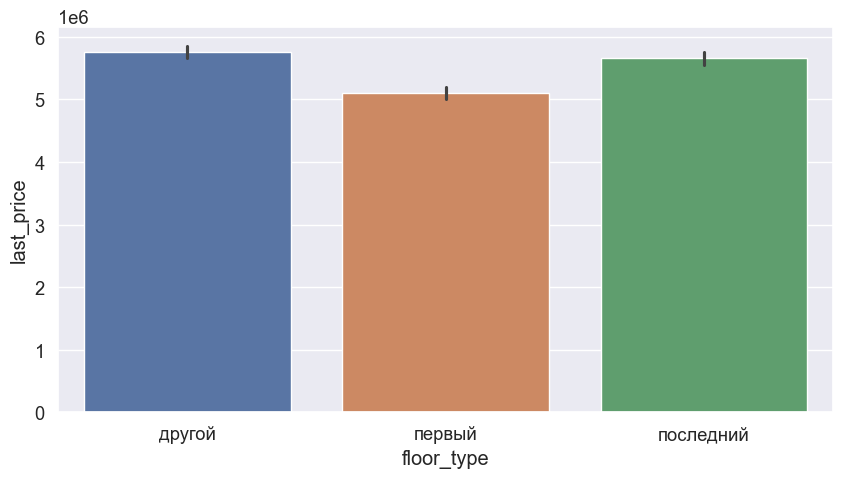

In [269]:
other_floor = data.query('floor_type == "другой" and locality_name == "Санкт-Петербург"').sample(n=1500)

equal_groups = pd.concat([other_floor, 
                          data.query('floor_type != "другой" and locality_name == "Санкт-Петербург"')], 
                         ignore_index=True)

sns.barplot(data=equal_groups, x='floor_type', y='last_price', hue='floor_type')
sns.set(font_scale=1.2)
plt.show()

When comparing three approximately equal subgroups, we confirmed that apartments with the "other" floor type are almost half a million more expensive than those on the first floor and slightly more expensive than those on the top floor.

**Summary**
Through exploratory data analysis, we identified correlations between price and the total apartment area, floor level, and number of rooms. Notably, the price gap between one- and two-room apartments is larger than between two- and three-room apartments.

The relationship between price and both living area and kitchen area is less pronounced. We hypothesize that this correlation would be stronger with cleaner data, which requires further investigation. Additionally, the potential link between price and the month of listing requires further study with data spanning a longer period.

There is no correlation between price and the day of the week when the listing was published.

### 4.4. Calculation of the Average Price per Square Meter
To calculate the average price per square meter, we will consider the 10 locations with the highest number of listings and determine the average value for each city in the top 10. Locations with fewer listings will be excluded, as a smaller dataset would be less representative.

In [270]:
main_cities = (data['correct_names'].value_counts() 
               .head(10)                            
               .index.values.tolist()               
              )

(data.query("correct_names in @main_cities")
 .pivot_table(index='correct_names',
              values='sq_meter_price',
              aggfunc=['count', 'mean'])
 .sort_values(('mean','sq_meter_price'), ascending=False)
 .round(1)
)

,count,mean
,sq_meter_price,sq_meter_price
correct_names,,
Санкт-Петербург,13695,105446.4
Пушкин,335,100288.8
Кудрово,469,95152.5
посёлок Парголово,326,90205.0
Мурино,590,86087.1
посёлок Шушары,440,78676.9
Колпино,335,75203.8
Гатчина,305,68421.5


The most expensive square meter is in St. Petersburg, which is expected, while the most affordable among the top ten is in Vyborg.

Since this study does not aim to analyze the reasons behind price fluctuations or forecast potential changes within individual cities, we cannot currently determine why the price per square meter varies across different regional cities.

### 4.5. Apartment Price and Distance from the City Center
Let's examine how the price per square meter is affected by the distance from the center. Most likely, the relationship is inverse: the farther from the center, the cheaper. However, we should first visualize this assumption numerically and then graphically.

We will move one kilometer away from the center at each step.

In [271]:
data['city_center_km'] = data['city_center_km'].round() 

price_per_km = (data.query('locality_name == "Санкт-Петербург"')
                .pivot_table(index='city_center_km',
                             values='last_price',
                             aggfunc='mean')
                .reset_index()
               )

price_per_km['last_price_mil'] = price_per_km['last_price'] / 1000000
price_per_km['city_center_km'] = price_per_km['city_center_km'].astype('int')
price_per_km

,city_center_km,last_price,last_price_mil
0,0,8.498182e+06,8.498182
1,1,8.187725e+06,8.187725
2,2,7.941600e+06,7.941600
3,3,7.366598e+06,7.366598
4,4,7.610582e+06,7.610582
5,5,7.670234e+06,7.670234
6,6,7.123484e+06,7.123484
7,7,6.681622e+06,6.681622
8,8,6.519964e+06,6.519964
9,9,5.602452e+06,5.602452


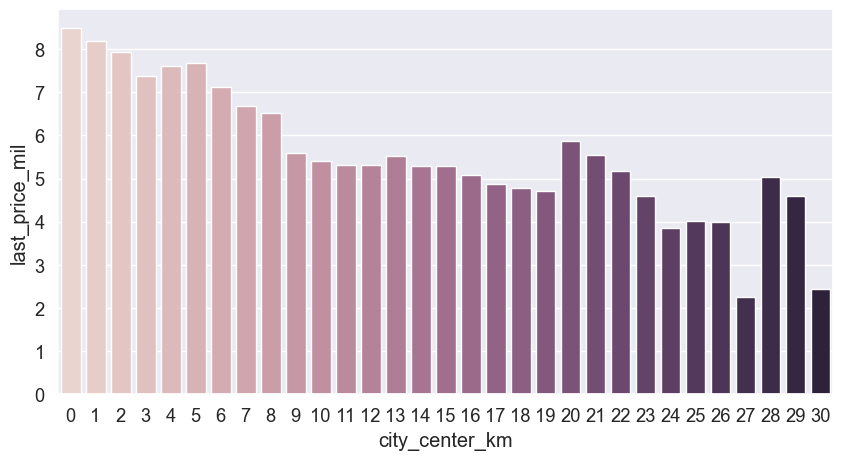

In [272]:
sns.barplot(data=price_per_km, x='city_center_km', y='last_price_mil', hue='city_center_km', legend=False)
plt.show()

Overall, the hypothesis is confirmed, but there is no linear relationship, which can be easily explained by the influence of related factors not accounted for in our dataset. For example, in addition to the distance from the city center, an important factor is proximity to metro stations, as well as the overall livability of the area where the apartment is located (green spaces, infrastructure quality, accessibility, kindergartens, schools, clinics, etc.).

## 5. General Conclusions
As a result of the exploratory data analysis, we identified how various factors influence apartment prices in St. Petersburg and nearby cities. The average price per square meter in St. Petersburg during the analyzed period is 105,364 rubles. Among the cities with the highest number of listings, Vyborg turned out to be the most affordable, with a price of 58,027 rubles per square meter.

The price is shaped by the following factors:
* Total apartment area
* Distance from the city center
* Number of rooms
* Floor on which the apartment is located

An optimal combination of these factors allows for a faster sale. Listings that were closed in less than 44 days can be considered fast sales. A selling period of 44–219 days is considered normal. At the same time, the month of listing creation may influence the selling period: publishing during a period of low demand may cause a longer time on the market. However, this statement requires further analysis.

The real estate market is not static: price fluctuations are observed from year to year, obviously influenced by external factors. The aforementioned "seasonal" fluctuations within a year are also possible; however, this assumption requires a more in-depth analysis on a dataset covering a longer period.

A more comprehensive picture of price formation could be provided by additional data on the neighborhood where the apartment is located, proximity to metro stations, and the presence or absence of major renovations in the building.